# **1. Data Exploration**

## **1.1 Data Preprocessing:**
Goal: Clean and prepare raw data to remove inconsistencies, handle missing values, and make the dataset ready for analysis and visualization.

In [19]:
# Importing Python Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Reading Dataset
df = pd.read_csv('../Data/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df_add = pd.read_csv('../Data/bank-additional-full.csv',sep=';')
df_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### *Data Discovery*

In [22]:
# Exploring how many variables (columns) and rows your dataset contains
print(df_add.shape,df.shape)


(41188, 21) (45211, 17)


The dataset, named "bank-full," contains both demographic and financial variables. It includes 17 variables and 45,211 rows, providing a robust and comprehensive dataset for building a reliable predictive model.

In [23]:
# Exploring the data completeness and Dtype of our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


All columns contain 45,211 non-null values, meaning there are **no missing values in any column**. This ensures data completeness, which is a positive aspect since no immediate imputation or removal of rows is necessary.

**7 columns are of data type int64 (integer)**. These columns are numerical and likely represent continuous or discrete variables.

**10 columns are of data type object**. These are categorical variables and may need to be encoded into numerical values if we are going to use them as features in our machine learning model.

In [24]:
# Get descriptive statistics for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Key Insights:**

Age: The average client age is 41 years, with a range from 18 to 95.

Balance: The average balance is €1362, with a large variability (std = €3044), and 50% of clients have a balance of less than €448.

Duration: The average call duration is 258 seconds (~4.3 minutes).

Campaign: Most clients were contacted between 1 and 3 times.

**Possible Outliers:** (to investigate)

Balance: A minimum balance of -€8019 (overdrafts) and a maximum balance of €102,127, indicating a few extreme values.

Duration: Calls as short as 0 seconds and as long as 4918 seconds (~82 minutes), suggesting potential outliers.

Campaign: Some clients were contacted up to 63 times, which is unusually high.

### *Missing Data*

In [25]:
# Select only categorical columns
Cat_columns=df.select_dtypes(include=['object']).columns
Cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [26]:
# Count "unknown" values in each categorical column
unknown_counts = df[Cat_columns].apply(lambda col: (col == "unknown").sum())

print(unknown_counts)


job            288
marital          0
education     1857
default          0
housing          0
loan             0
contact      13020
month            0
poutcome     36959
y                0
dtype: int64


### Steps for Handling Missing Values in Categorical Columns:
- Drop Irrelevant Columns: If a column with "unknown" values does not contribute significant predictive power (e.g., poutcome and contact), it can be excluded from the analysis.
- Remove Rows with "Unknown" Values: For variables like job and education, consider removing rows where the value is "unknown" to ensure data quality and accuracy.

In [27]:
# Handling missing Data
# Use drop function to remove the insignifiant columns : poutcome and contact
df_drop_columns=df.drop(columns=['poutcome','contact'])
# column-by-column toggle to clean up preprocessing
# comment out whichever columnns you do not want to remove the unknowns for
columns_to_clean = [
#    'age',           
    'job',           
#    'marital',       
    'education',     
#    'default',      
#    'balance',      
#    'housing',      
#    'loan',                
#    'day',          
#    'month',       
#    'duration',     
#    'campaign',      
#    'pdays',         
#    'previous',            
#    'y'              
]

# processing out any unknown data as defined above
for column in columns_to_clean:
    if column in df_drop_columns.columns and df_drop_columns[column].dtype == 'object':  #only object (i.e. string-based) columns are filtered out
       df_clean = df_drop_columns[df_drop_columns[column] != 'unknown']

# sav or display
print(f"Data cleaned with columns: {columns_to_clean}")
df_clean.head()  # displays the first few column

Data cleaned with columns: ['job', 'education']


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no


In [12]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

### *Outliers*

Indentify outliers in numerical variables :

**Isolation Forest for Outlier Detection** is an unsupervised machine learning algorithm that isolates anomalies by recursively partitioning data. Outliers are identified by shorter path lengths in decision trees, as they are easier to isolate than regular data points.

We Choose Isolation Forest Over Z-score or IQR for the following reasons:

- Multidimensional Data: Unlike Z-score and IQR, which are typically for univariate data, Isolation Forest works well with high-dimensional datasets.
- No Distribution Assumptions: Z-score and IQR assume normal distribution; Isolation Forest does not, making it robust for non-normal data.
- Scalability: It efficiently handles large datasets and is computationally less expensive than Z-score or IQR for big data.
- Flexible Outlier Proportion: You can specify the expected outlier proportion (via `contamination`), making it adaptable to various datasets.


In [28]:
from sklearn.ensemble import IsolationForest

# Selecting numerical columns for outlier detection
X = df_clean.select_dtypes(include=[np.number])

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42) # Expecting 5% of the data to be outliers
model.fit(X)

# Predicting outliers
df_clean['outlier'] = model.predict(X)

# Map the predictions: 1 -> False (inliers), -1 -> True (outliers)
df_clean['outlier'] = df_clean['outlier'].map({1: False, -1: True})

# Remove the outliers from the data
df_cleaned=df_clean[df_clean['outlier']==False]
df_cleaned=df_cleaned.drop(columns='outlier')
df_cleaned.shape


C:\Users\yihan\AppData\Local\Temp\ipykernel_11864\1113786985.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['outlier'] = model.predict(X)
C:\Users\yihan\AppData\Local\Temp\ipykernel_11864\1113786985.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['outlier'] = df_clean['outlier'].map({1: False, -1: True})


(41186, 15)

### *Convert categorical variables to numerical*

**Converting categorical variables to numerical values** ensures compatibility with machine learning algorithms, improves model performance, enhances interpretability, and facilitates more efficient data storage and processing.

- **One-Hot Encoded**: This Encoding method fits becasue the data set showing small to medium cardinality and has nominal categorical variables where categories do not have a meaningful order.

In [29]:
# Convert categorical variables to numerical codes using one hot encoding method
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_clean_encoded = pd.get_dummies(df_cleaned,columns=categorical_columns)

# Replace True/False with 1/0 
df_clean_encoded = df_clean_encoded.replace({True: 1, False: 0})

# Display the resulting DataFrame
df_clean_encoded



C:\Users\yihan\AppData\Local\Temp\ipykernel_11864\168703681.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean_encoded = df_clean_encoded.replace({True: 1, False: 0})


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [30]:
# Show the number of unique values for each column 
unique_counts = df_cleaned[categorical_columns].nunique()
print("Number of unique values in each column:") 
print(unique_counts)

# Unique values for each column 
unique_values = {column: df_cleaned[column].unique() for column in categorical_columns} 

for column, values in unique_values.items(): 
    print(f"{column}: {values}")


Number of unique values in each column:
job          12
marital       3
education     3
default       2
housing       2
loan          2
month        12
y             2
dtype: int64
job: ['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
y: ['no' 'yes']


### *Scale the variables*
Scaling variables ensures that all features are on a comparable scale, improving model performance, reducing bias, enhancing interpretability, and maintaining numerical stability.


- **StandardScaler**: Using StandardScaler ensures that the numerical features in the DataFrame are standardized to a common scale. This normalization can significantly enhance model performanceand and ensure that features with different units do not bias the model. It will also give better support for algorithms like k-nearest neighbors (KNN), k-means clustering which rely on distance metrics, scaled features ensure that no single feature dominates the distance calculations.

In [16]:
#Scale the variables to ensure uniformity across features.
from sklearn.preprocessing import StandardScaler
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Apply Standardization
scaler = StandardScaler() 
df_clean_encoded[numerical_columns] = scaler.fit_transform(df_clean_encoded[numerical_columns]) 

print("Standardized DataFrame:")
df_clean_encoded

Standardized DataFrame:


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_no,y_yes
0,1.712900,0.482038,-1.309555,0.033408,-0.614612,-0.371844,-0.344067,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.339795,-0.543393,-1.309555,-0.416710,-0.614612,-0.371844,-0.344067,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.739073,-0.556490,-1.309555,-0.723609,-0.614612,-0.371844,-0.344067,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,-0.542916,-0.445410,-1.309555,-0.465814,-0.614612,-0.371844,-0.344067,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,-1.229468,-0.340635,-1.309555,-0.146639,-0.614612,-0.371844,-0.344067,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,-1.719863,-0.502648,0.140297,0.053868,-0.614612,-0.371844,-0.344067,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45205,-1.523705,-0.312501,0.140297,0.544905,-0.245327,-0.371844,-0.344067,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45206,1.026347,-0.157280,0.140297,2.963265,0.123959,-0.371844,-0.344067,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45207,2.987926,0.281220,0.140297,0.831344,-0.245327,-0.371844,-0.344067,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### *Univariate Analysis*
Univariate analysis provides insights into the distribution and characteristics of individual features, highlighting trends, patterns, and relationships with the target variable. By analyzing continuous and categorical variables, it helps identify outliers, skewness, and imbalances, which can impact model performance. This analysis is crucial for understanding the data structure and selecting relevant features, ensuring informed decisions for further modeling and improving overall model effectiveness.

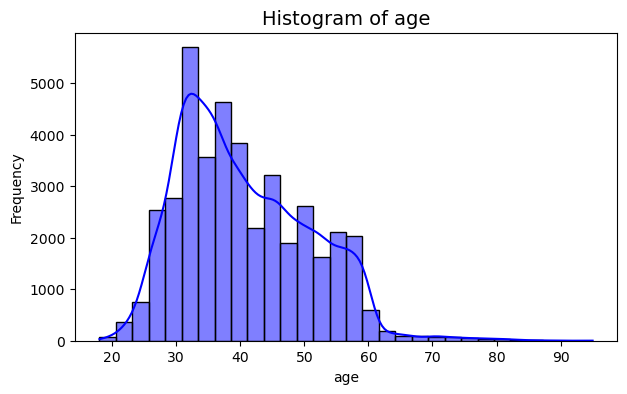

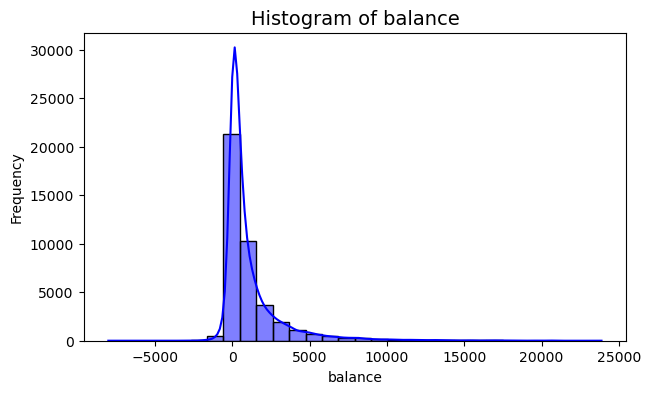

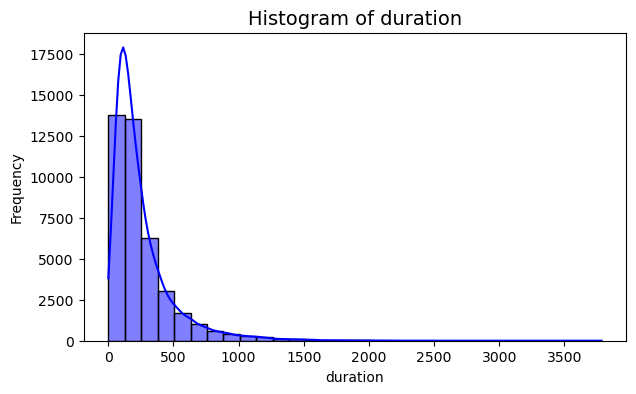

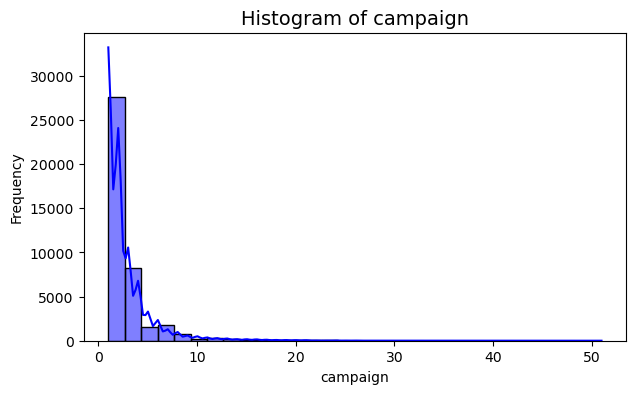

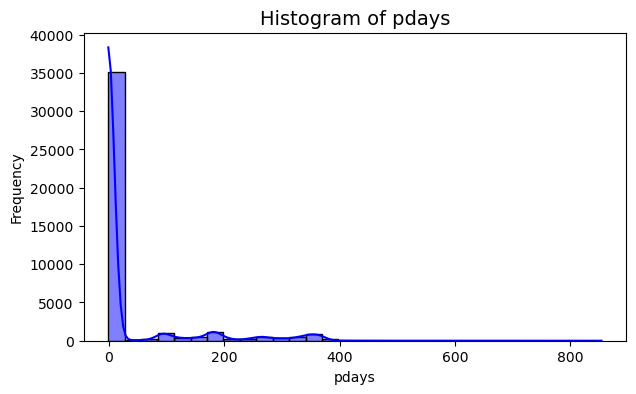

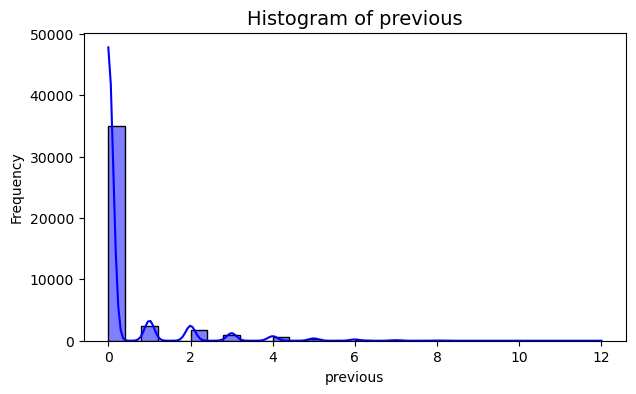

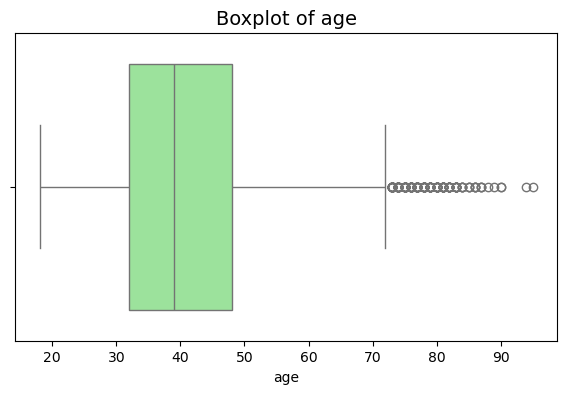

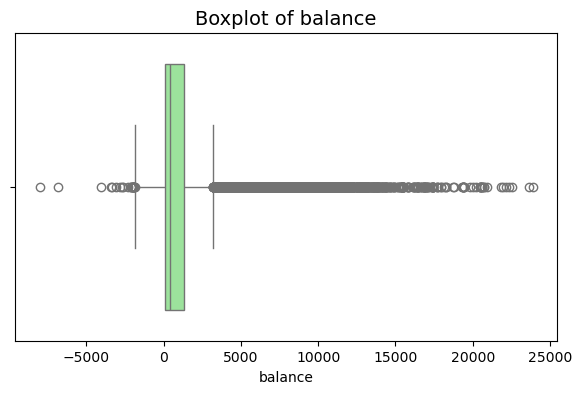

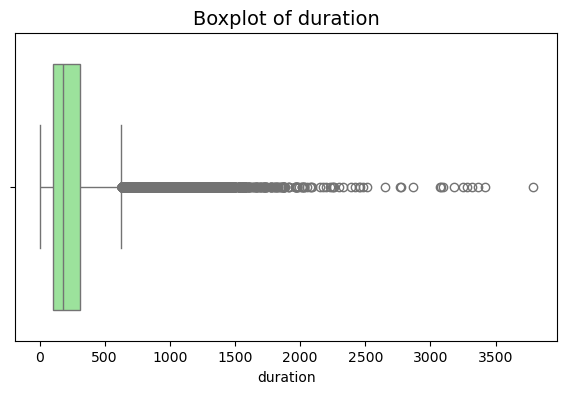

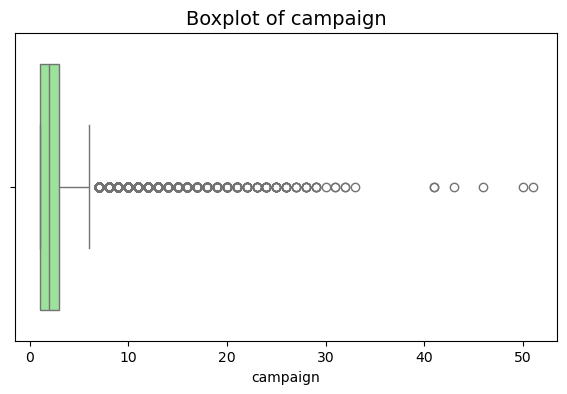

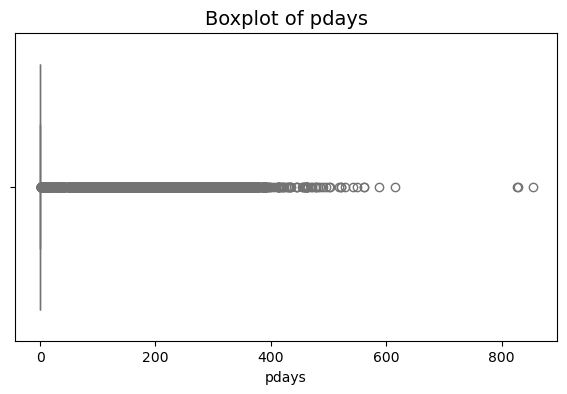

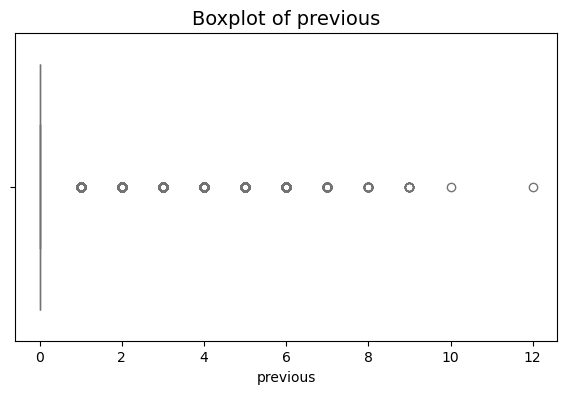

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables for univariate analysis
continuous_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


# Create histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(7, 4))
    sns.histplot(df_clean_encoded[var], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df_clean_encoded[var], color='lightgreen')
    plt.title(f'Boxplot of {var}', fontsize=14)
    plt.xlabel(var)
    plt.show()




- Age: The age distribution is slightly right-skewed, with most clients between 20-60 years old, peaking in the early 30s. This suggests that individuals in their 30s are more likely to subscribe to term deposits, indicating they are at a financially stable point in life and more interested in planning for future savings.

- Balance: The balance distribution is also right-skewed, with the majority of clients having lower balances (peaking around 1000), while a small group holds significantly higher balances. This implies that most clients have modest savings, but a minority possess substantially larger amounts, which could reflect a more affluent client segment.

- Duration: The right-skewed distribution of conversation durations indicates that most client interactions last between 0-300 seconds. Notably, the frequency of contacts lasting 151-300 seconds matches the frequency of shorter 0-150 seconds contacts, suggesting that clients are engaging in relatively longer conversations (2-3 minutes). This is a positive sign for potential sales as it reflects a higher level of customer interest and willingness to communicate.

- Campaign: The number of contacts in the current campaign shows a right-skewed distribution, with the majority of clients being contacted only once or twice. There's a sharp drop-off as the number of contacts increases, indicating that most clients do not require multiple follow-ups, suggesting that initial contact is often sufficient to generate interest or responses.

- Pdays: The days since the last contact follow a right-skewed distribution, indicating that most clients have relatively short intervals (within a month) between contacts. This suggests that clients are engaged with the campaign on a relatively frequent basis, while a smaller group experiences longer gaps, which might imply less engagement or more irregular outreach.

- Previous: The number of previous contacts also exhibits a right-skewed distribution, with the majority of clients having zero or only a few prior interactions before the current campaign. This indicates that most clients are relatively new to the campaign or have only had a limited number of previous contacts, suggesting that ongoing engagement and follow-up efforts may still be in the early stages for many clients.

C:\Users\yihan\AppData\Local\Temp\ipykernel_11864\393239192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean_encoded[var], palette='coolwarm')


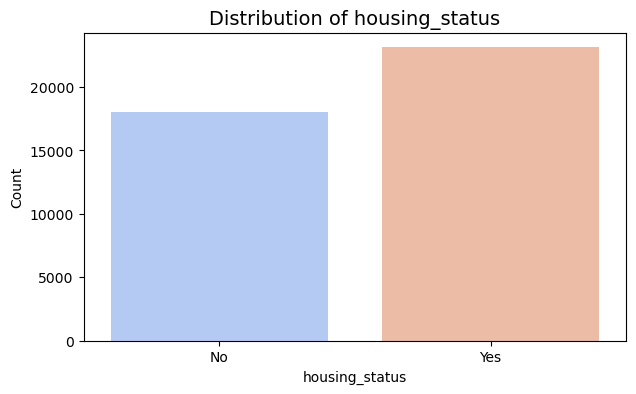

C:\Users\yihan\AppData\Local\Temp\ipykernel_11864\393239192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean_encoded[var], palette='coolwarm')


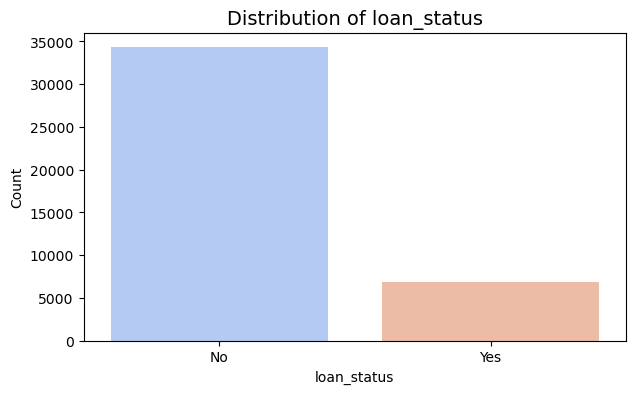

C:\Users\yihan\AppData\Local\Temp\ipykernel_11864\393239192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean_encoded[var], palette='coolwarm')


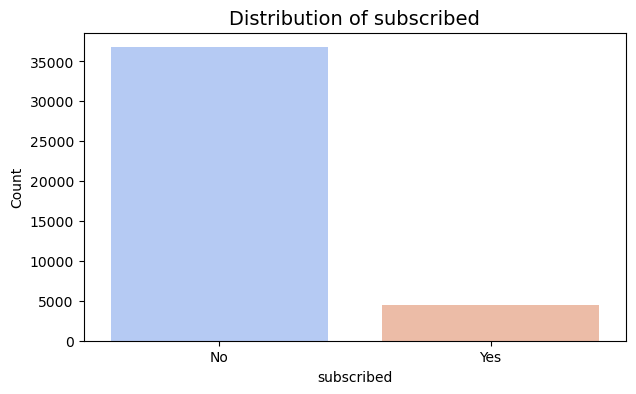

In [52]:
# Combining binary columns into one (for example housing)
df_clean_encoded['housing_status'] = df_clean_encoded['housing_yes']  # housing_yes = 1 means "Has Housing Loan"
df_clean_encoded['loan_status'] = df_clean_encoded['loan_yes']  # loan_yes = 1 means "Has Personal Loan"
df_clean_encoded['subscribed'] = df_clean_encoded['y_yes']  # y_yes = 1 means "Subscribed"

# Create a list of new combined variables for plotting
combined_vars = ['housing_status', 'loan_status', 'subscribed']

# Create bar charts for combined categorical variables
for var in combined_vars:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=df_clean_encoded[var], palette='coolwarm')
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0/1 with 'No'/'Yes' for better clarity
    plt.show()







- Housing Status: The majority of clients have a housing loan, suggesting that owning a home is common among this group. This could indicate financial stability or a tendency to invest in property.

- Loan Status: A large portion of clients do not have a personal loan, which may indicate that they are either debt-averse or able to manage their finances without relying on additional borrowing.

- Subscribed (Term Deposit): The low subscription rate for term deposits suggests that most clients are either not interested in long-term savings products or are not yet financially ready to commit to such investments.